<a href="https://colab.research.google.com/github/velish-qubadov/Deep-Learning/blob/main/Neural_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3,  1]]
y_pred = per_clf.predict(X_new)

In [ ]:
y_pred


array([ True, False])

In [ ]:

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='perceptron', penalty=None,
                        learning_rate='constant', eta0=1, random_state=42)

sgd_clf.fit(X, y)
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()

MLP (Multi-Layer Perceptron) nədir?

MLP — çoxqatlı bir neyron şəbəkəsidir.
Bu model, giriş qatları, gizli qatlar (hidden layers) və çıxış qatları ilə qurulur. MLP, feedforward (irəliləyən) neyron şəbəkələri kimi işləyir, yəni verilənlər bir tərəfə doğru (girişdən çıxışa doğru) keçir.

MLP modelinin əsas komponentləri:
Giriş Qatları (Input Layer): Modelə verilən məlumat buradan daxil olur.

Gizli Qatlar (Hidden Layers): Bu qatlar, girişlərdən alınan məlumatları emal edir. Hər gizli qat özündə çox sayda neyron saxlayır.

Çıxış Qatları (Output Layer): Modelin nəticəsi buradan çıxır.
İstifadə sahələri:

MLP geniş şəkildə sınıflandırma (classification) və regressiya (regression) məsələlərində istifadə olunur.

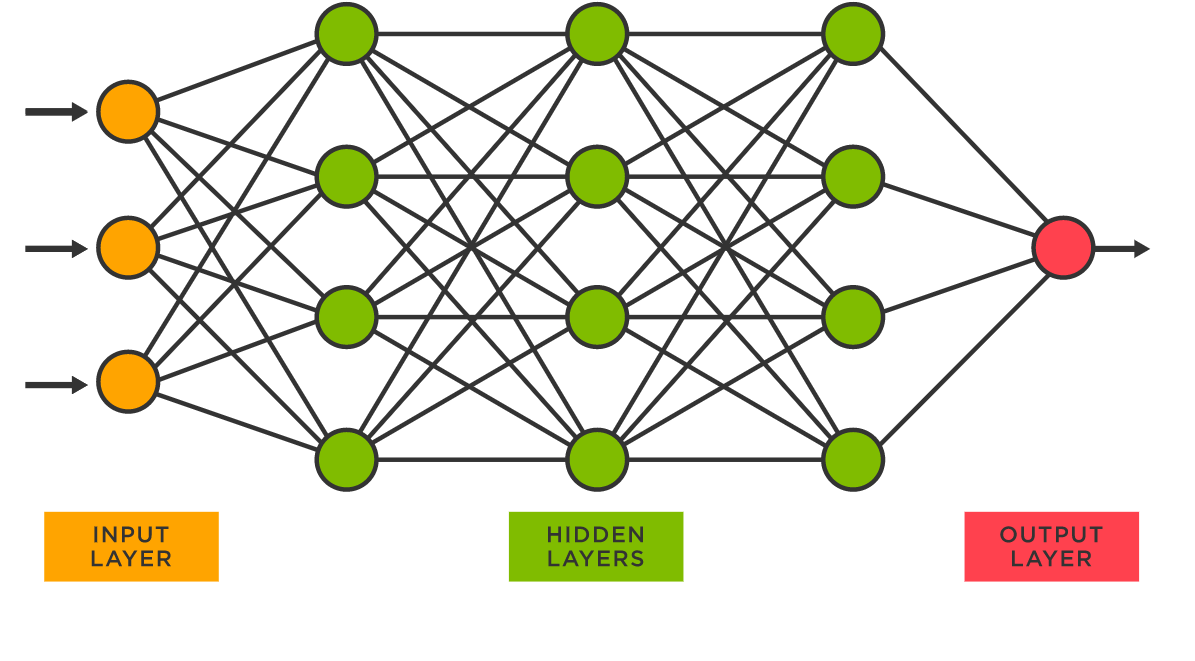

In [ ]:

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42) # Neyron şəbəkəsi modelini yaradaraq üç gizli qat (hidden_layer_sizes=[50, 50, 50]) təyin edir. Hər bir qat 50 neyrona sahib olacaq.
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred) # Remove squared=False

In [ ]:
rmse


0.5053326657968684

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris=load_iris()
X_train_full,X_test,y_train_full,y_test= train_test_split(
    iris.data,iris.target, test_size=0.1, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)

pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

# Implementing MLPs with Keras


In [ ]:
import tensorflow as tf
fashion_mnist= tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]  #55 000
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]  #5 000

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255 #Scaling(normallaşdırma)

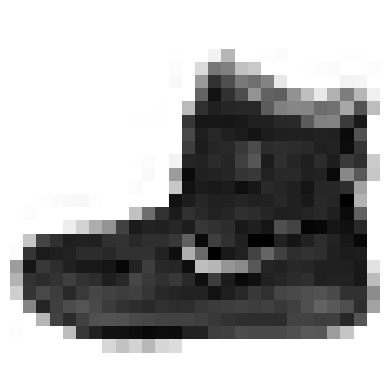

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
class_names=['T_shirt/top','Trousers','Pullover','Dress','Coat',
             'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
class_names[y_train[0]]

'Ankle boot'

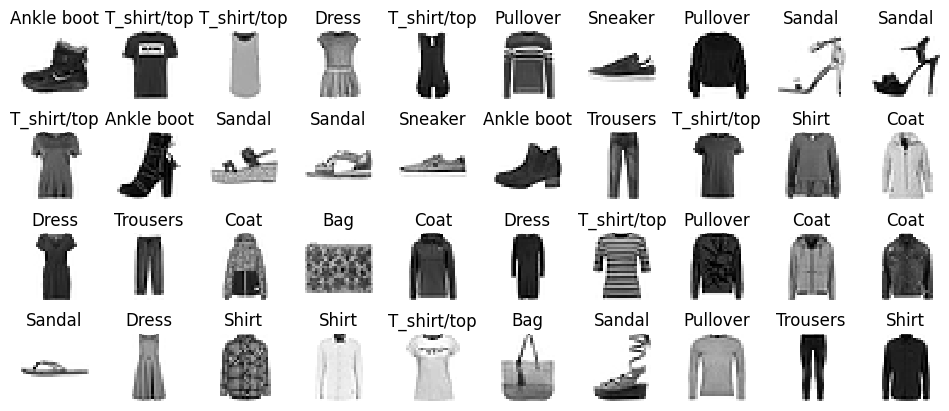

In [ ]:
n_rows=4
n_cols=10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index=n_cols*row +col
    plt.subplot(n_rows, n_cols, index+1)
    plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28])) #input
model.add(tf.keras.layers.Flatten()) # (28*28,1)
model.add(tf.keras.layers.Dense(300, activation='relu')) # hidden
model.add(tf.keras.layers.Dense(100, activation='relu'))  # hidden
model.add(tf.keras.layers.Dense(10, activation='softmax'))  #output

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


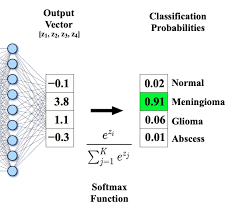

max(0,z)  z menfidirse cavab 0, z musbetdirse z qaytarair(relu)


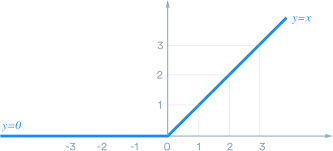

In [ ]:
tf.keras.backend.clear_session() # calisdiranda tezden baslayir
tf.random.set_seed(42)
model= tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[28,28]),
      tf.keras.layers.Dense(300, activation='relu'),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

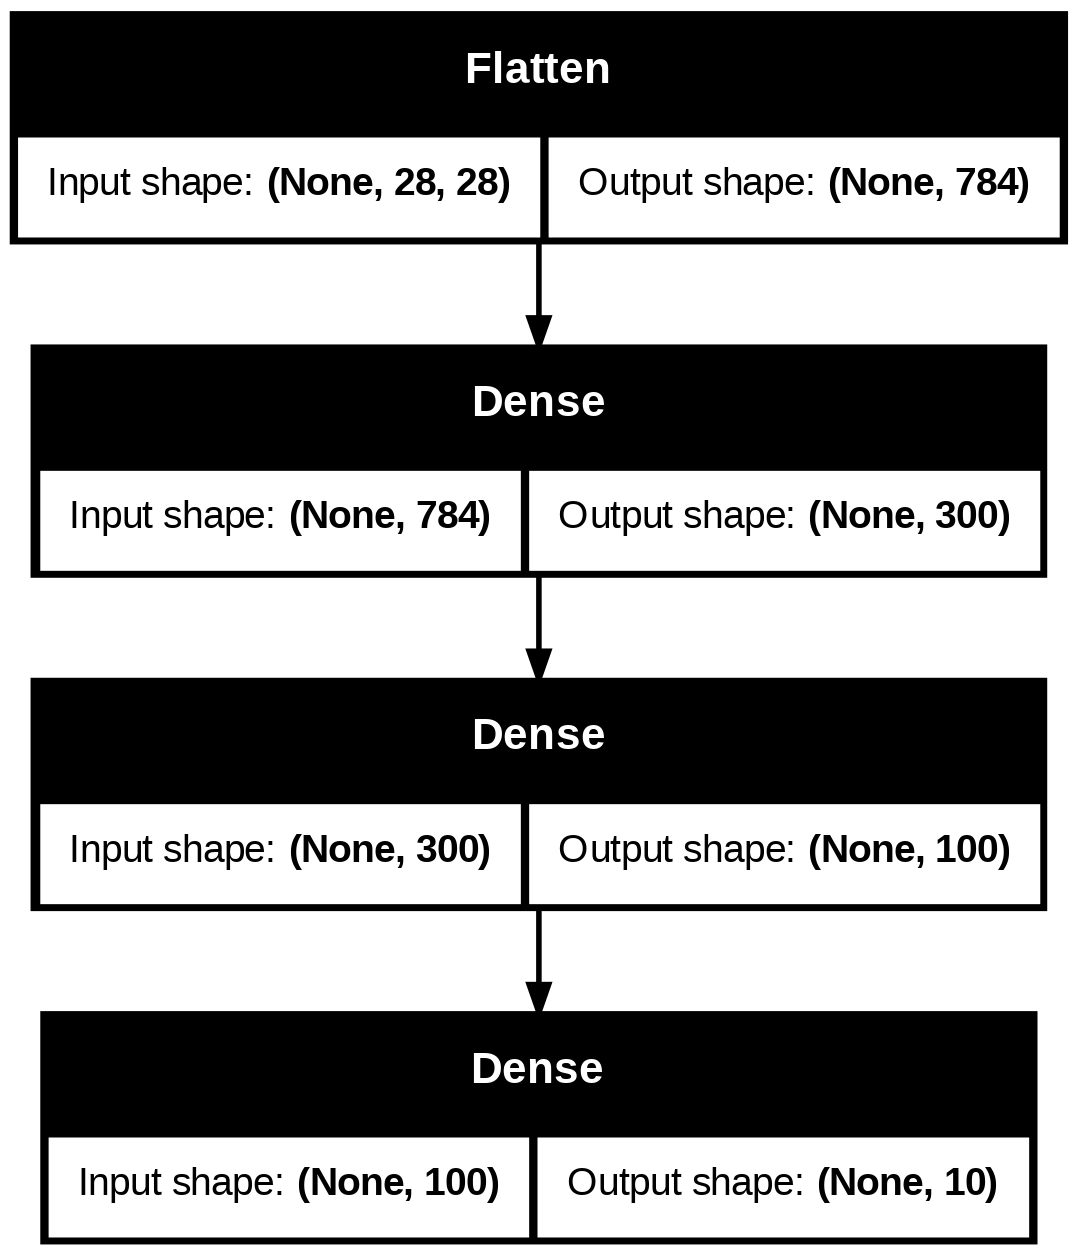

In [ ]:
tf.keras.utils.plot_model(model,'my_fashion_mnist_model.png', show_shapes=True)

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
hidden1= model.layers[1]
hidden1.name

'dense'

In [ ]:
 model.get_layer('dense') is hidden1

True

In [ ]:
weights, biases= hidden1.get_weights()
weights

array([[ 0.05654843,  0.04170059,  0.01226874, ..., -0.03239996,
         0.06527083, -0.06065245],
       [ 0.04778273, -0.05838744, -0.06941186, ..., -0.02249727,
         0.0049526 ,  0.01912121],
       [ 0.00260338, -0.00716364,  0.01244298, ..., -0.02324345,
        -0.02610872, -0.05058158],
       ...,
       [ 0.01626292,  0.04766066,  0.01472249, ..., -0.02959939,
         0.02143132,  0.01386739],
       [ 0.06747431, -0.0060902 ,  0.03262576, ..., -0.02132589,
         0.00674602,  0.03551588],
       [-0.00497648,  0.02988229, -0.00186155, ...,  0.0318035 ,
         0.04027153,  0.02024806]], dtype=float32)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
weights.shape #yuxardaki sekilde sagdakilar

(784, 300)

In [ ]:
biases.shape

(300,)

# Compiling the model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',   # log loss - categorical_crossentropy
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy]),

(None,)

In [ ]:
tf.keras.utils.to_categorical([0,5,1,0],num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
np.argmax(
      [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      axis=1
)

array([0, 5, 1, 0])

# Training and evaluating the model

In [ ]:
history= model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 1.0036 - sparse_categorical_accuracy: 0.6840 - val_loss: 0.5041 - val_sparse_categorical_accuracy: 0.8272
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.5080 - sparse_categorical_accuracy: 0.8258 - val_loss: 0.4507 - val_sparse_categorical_accuracy: 0.8412
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.4532 - sparse_categorical_accuracy: 0.8434 - val_loss: 0.4263 - val_sparse_categorical_accuracy: 0.8482
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.4228 - sparse_categorical_accuracy: 0.8526 - val_loss: 0.4099 - val_sparse_categorical_accuracy: 0.8542
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4015 - sparse_categorical_accuracy: 0.8596 - val_loss: 0.3978 - val_sparse_categorical_accuracy: 0.8588
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.3848 - sparse_categorical_accuracy: 0.8647 - val_loss: 0.3887 - val_sparse_categorical_accuracy

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


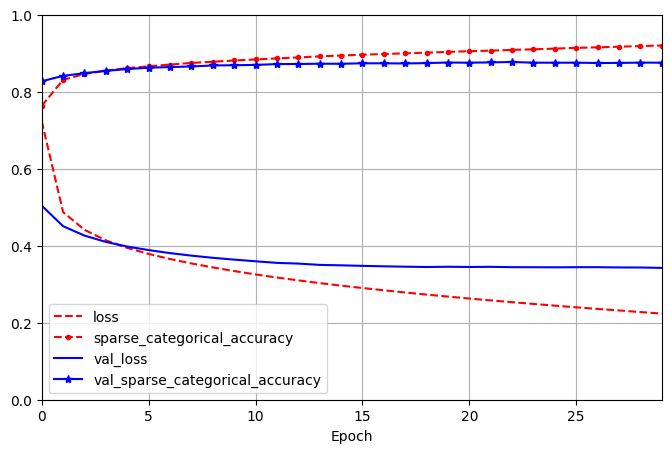

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel='Epoch',
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")    # extra code
plt.show()

In [ ]:
history.history

{'loss': [0.7234371900558472,
  0.4874303936958313,
  0.44134068489074707,
  0.4140337109565735,
  0.3943415880203247,
  0.37871119379997253,
  0.3655029833316803,
  0.3540038466453552,
  0.34368696808815,
  0.3342393934726715,
  0.32544854283332825,
  0.31742584705352783,
  0.309989869594574,
  0.30294185876846313,
  0.29632899165153503,
  0.29021939635276794,
  0.28426796197891235,
  0.2786058187484741,
  0.2730919122695923,
  0.2678830623626709,
  0.262803316116333,
  0.25803452730178833,
  0.25336921215057373,
  0.24884170293807983,
  0.2443525642156601,
  0.2400159388780594,
  0.23588134348392487,
  0.23188437521457672,
  0.22775709629058838,
  0.22371432185173035],
 'sparse_categorical_accuracy': [0.7633090615272522,
  0.8310727477073669,
  0.8459272980690002,
  0.8548181653022766,
  0.8614181876182556,
  0.8660181760787964,
  0.8705090880393982,
  0.8747454285621643,
  0.8778908848762512,
  0.8811272978782654,
  0.8838363885879517,
  0.8866181969642639,
  0.8889999985694885,
  0

In [ ]:
model.evaluate(X_test, y_test) #score overfitting fln anlamaq ucun yuxarda axan kodlarda baxa bilersen

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3695 - sparse_categorical_accuracy: 0.8662


[0.3672538697719574, 0.8684999942779541]

In [ ]:
X_new= X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.01, 0.  , 0.9 ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred= y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trousers'], dtype='<U11')

In [ ]:
y_new= y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

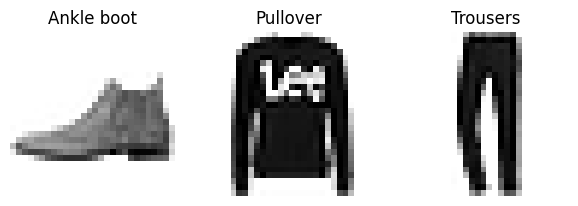

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
  plt.subplot(1, 3, index + 1)
  plt.imshow(image, cmap='binary', interpolation='nearest')
  plt.axis('off')
  plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


**House Data**

In [ ]:
houising= fetch_california_housing()
X_train_full, X_test, y_train_full, y_test= train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid= train_test_split(
    X_train_full, y_train_full, random_state=42)

In [ ]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(42)
norm_layer= tf.keras.layers.Normalization(input_shape=X_train.shape[1:]) # sutun sayin verir ici ve normallasdirir standard scaling
model= tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history=model.fit(X_train, y_train, epochs=20,
                  validation_data=(X_valid,y_valid))
mse_test, rmse_test= model.evaluate(X_test,y_test)
X_new= X_test[:3]
y_pred= model.predict(X_new)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.0908 - loss: 1.2587 - val_RootMeanSquaredError: 0.6336 - val_loss: 0.4015
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6402 - loss: 0.4105 - val_RootMeanSquaredError: 0.5884 - val_loss: 0.3463
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6096 - loss: 0.3719 - val_RootMeanSquaredError: 0.6146 - val_loss: 0.3778
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5969 - loss: 0.3565 - val_RootMeanSquaredError: 0.5757 - val_loss: 0.3315
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5852 - loss: 0.3427 - val_RootMeanSquaredError: 0.5644 - val_loss: 0.3185
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5763 - loss: 0.3323 - val_RootMeanSquaredError: 0.5651 - val_loss: 0.3193
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5692 - loss: 0.3242 -

# Functional API

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

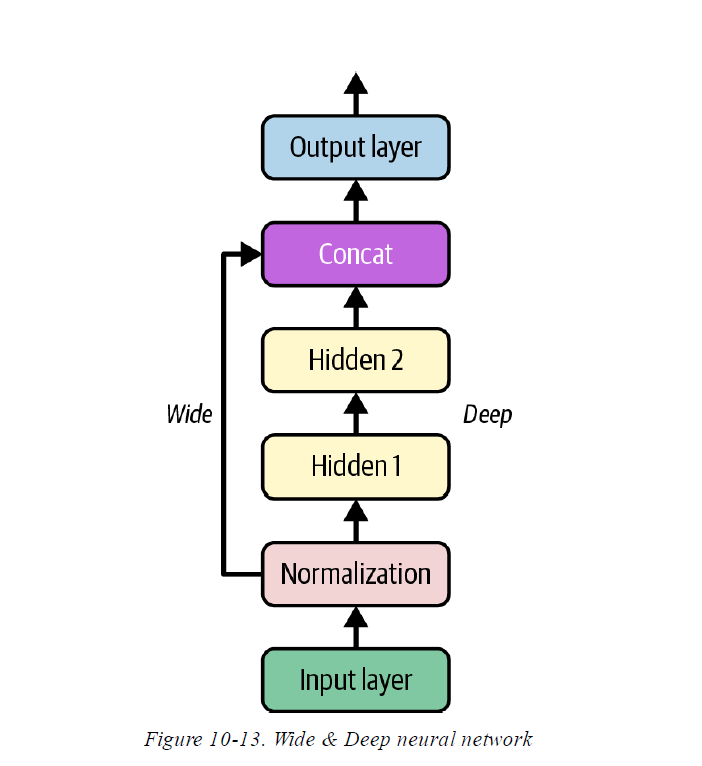

In [ ]:
normalization_layer= tf.keras.layers.Normalization()
hidden_layer1=tf.keras.layers.Dense(30, activation='relu')
hidden_layer2=tf.keras.layers.Dense(30, activation='relu')
concat_layer=tf.keras.layers.Concatenate()
output_layer=tf.keras.layers.Dense(1)

input_ =tf.keras.layers.Input(shape=X_train.shape[1:])
normalized=normalization_layer(input_)
hidden1=hidden_layer1(normalized)
hidden2=hidden_layer2(hidden1)
concat= concat_layer([normalized, hidden2])
output=output_layer(concat)
model=tf.keras.Model(inputs=[input_], outputs=[output])

In [ ]:
normalized.shape #None back size

(None, 8)

In [ ]:
hidden2.shape

(None, 30)

In [ ]:
concat.shape

(None, 38)

In [ ]:
model.get_weights()

[array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 np.int64(0),
 array([[ 0.05751956,  0.09067625,  0.34342453, -0.3011124 , -0.33580267,
         -0.318119  , -0.11881387, -0.14272752, -0.20040531, -0.1855541 ,
          0.13574961,  0.3248975 ,  0.02190039, -0.19316052,  0.32394853,
          0.21467957, -0.26326287,  0.13962427, -0.24310105,  0.3337181 ,
          0.03691435, -0.10810262,  0.08675125,  0.3397648 ,  0.34364226,
         -0.08049798, -0.18287481, -0.3680329 , -0.14181387,  0.26854804],
        [ 0.10569486, -0.3854845 , -0.12313628,  0.32786837,  0.32571444,
          0.13242695, -0.11192879,  0.16426542,  0.06448603, -0.3751466 ,
         -0.16778544, -0.2737861 ,  0.1806294 , -0.35124287, -0.24588767,
         -0.27382892, -0.3703015 ,  0.05311844,  0.21668366,  0.18366918,
         -0.305057  , -0.01599792,  0.11777613,  0.25915763,  0.28287014,
          0.02831936,  0.23044953, -0.16414437, -0.394990

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 8)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 8)              │             17 │ input_layer[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 30)             │            270 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 30)             │            930 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 38)             │              0 │ normalization[0][0],   │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             39 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
normalization_layer.adapt(X_train)
history=model.fit(X_train,y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test= model.evaluate(X_test,y_test)
y_pred= model.predict(X_new)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.6277 - loss: 2.7873 - val_RootMeanSquaredError: 1.0743 - val_loss: 1.1542
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7296 - loss: 0.5341 - val_RootMeanSquaredError: 0.6330 - val_loss: 0.4007
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6555 - loss: 0.4303 - val_RootMeanSquaredError: 0.6103 - val_loss: 0.3725
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6314 - loss: 0.3990 - val_RootMeanSquaredError: 0.7675 - val_loss: 0.5891
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6192 - loss: 0.3837 - val_RootMeanSquaredError: 0.7063 - val_loss: 0.4989
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6112 - loss: 0.3738 - val_RootMeanSquaredError: 0.9059 - val_loss: 0.8207
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6069 - loss: 0.3685 -

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(3, 8))
  warnings.warn(msg)


In [ ]:
tf.random.set_seed(42)

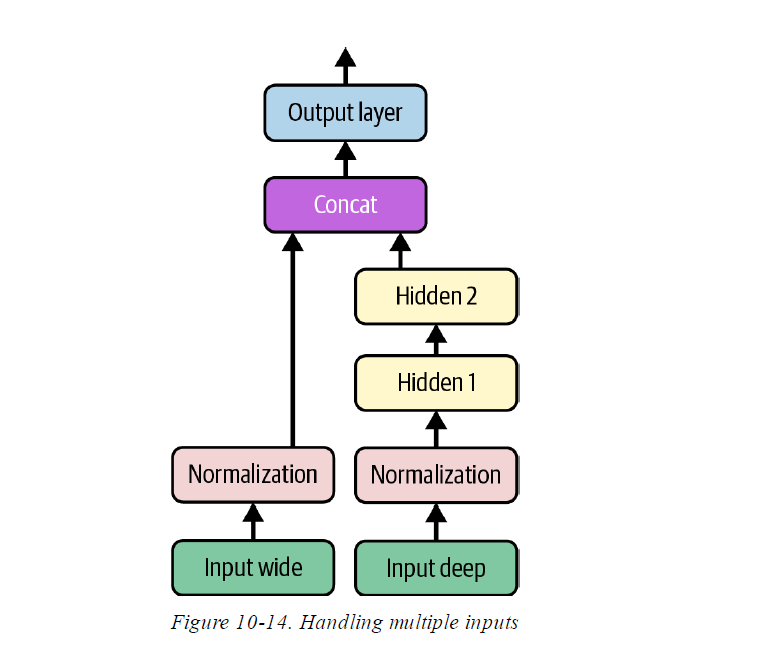

In [ ]:
input_wide = tf.keras.layers.Input(shape=[5])   # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])   # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [ ]:

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.5789 - loss: 2.6130 - val_RootMeanSquaredError: 1.9582 - val_loss: 3.8344
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7425 - loss: 0.5518 - val_RootMeanSquaredError: 0.9309 - val_loss: 0.8666
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6740 - loss: 0.4546 - val_RootMeanSquaredError: 0.6608 - val_loss: 0.4366
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6531 - loss: 0.4268 - val_RootMeanSquaredError: 0.6206 - val_loss: 0.3852
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6420 - loss: 0.4124 - val_RootMeanSquaredError: 0.6023 - val_loss: 0.3628
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6332 - loss: 0.4012 - val_RootMeanSquaredError: 0.5962 - val_loss: 0.3554
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6263 - los

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

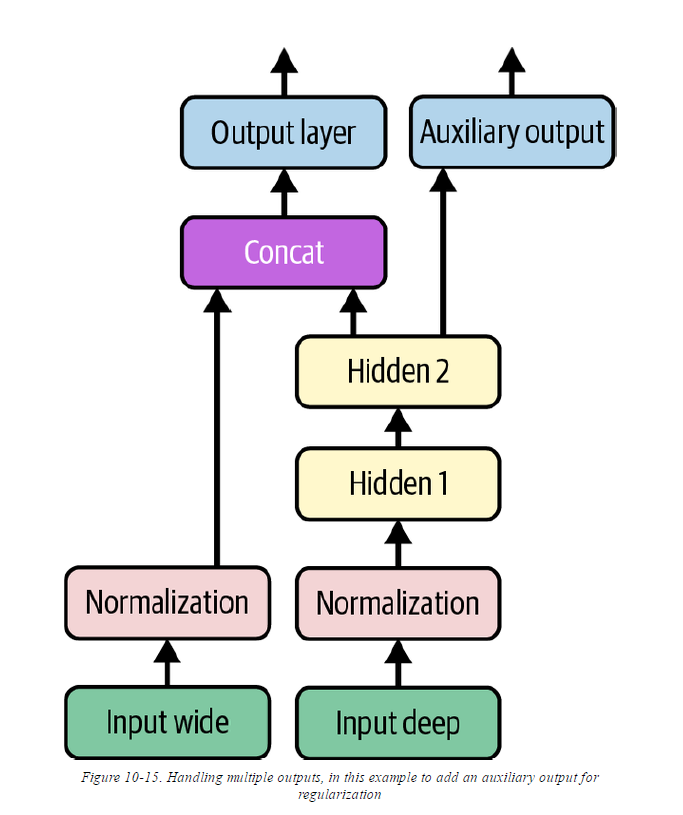

In [ ]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=('mse', "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer, #90 outputdan, 10 digerinden(auxilary)
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

In [ ]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep),(y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - dense_2_RootMeanSquaredError: 1.5546 - dense_2_loss: 2.4980 - dense_3_RootMeanSquaredError: 1.7272 - dense_3_loss: 3.0622 - loss: 2.5544 - val_dense_2_RootMeanSquaredError: 0.9073 - val_dense_2_loss: 0.8229 - val_dense_3_RootMeanSquaredError: 2.2177 - val_dense_3_loss: 4.9160 - val_loss: 1.2326
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_2_RootMeanSquaredError: 0.8024 - dense_2_loss: 0.6444 - dense_3_RootMeanSquaredError: 0.9210 - dense_3_loss: 0.8496 - loss: 0.6650 - val_dense_2_RootMeanSquaredError: 0.7535 - val_dense_2_loss: 0.5676 - val_dense_3_RootMeanSquaredError: 1.1264 - val_dense_3_loss: 1.2682 - val_loss: 0.6378
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_2_RootMeanSquaredError: 0.7299 - dense_2_loss: 0.5331 - dense_3_RootMeanSquaredError: 0.7824 - dense_3_loss: 0.6123 - loss: 0.5410 - val_dense_2_RootMeanSquaredError: 0.8258 - val_dense_2_loss: 0.6817 - val_dense_3_RootMeanSquaredError: 0.7

In [ ]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - dense_2_RootMeanSquaredError: 0.5769 - dense_2_loss: 0.3329 - dense_3_RootMeanSquaredError: 0.6307 - dense_3_loss: 0.3979 - loss: 0.3394


In [ ]:
eval_results

[0.3344314992427826,
 0.3275970220565796,
 0.3906145393848419,
 0.5728764533996582,
 0.6250033974647522]

In [ ]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [ ]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [ ]:
y_pred

{'dense_2': array([[0.46481907],
        [1.2448995 ],
        [3.6188152 ]], dtype=float32),
 'dense_3': array([[0.67311245],
        [1.1741803 ],
        [3.3628433 ]], dtype=float32)}

# Using the Subclassing API to Build Dynamic Models

In [ ]:
class WideAndDeepModel(tf.keras.Model):
  def __init__(self, units=30, activation='relu',**kwargs):
    super().__init__(**kwargs)
    self.norm_layer_wide= tf.keras.layers.Normalization()
    self.norm_layer_deep=tf.keras.layers.Normalization()
    self.hidden1=tf.keras.layers.Dense(units, activation=activation)
    self.hidden2=tf.keras.layers.Dense(units, activation=activation)
    self.main_output= tf.keras.layers.Dense(1)
    self.aux_output=tf.keras.layers.Dense(1)

  def call(self,inputs):
    input_wide, input_deep = inputs
    norm_wide = self.norm_layer_wide(input_wide)
    norm_deep = self.norm_layer_deep(input_deep)
    hidden1 = self.hidden1(norm_deep)
    hidden2 = self.hidden2(hidden1)
    concat = tf.keras.layers.concatenate([norm_wide, hidden2])
    output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return output, aux_output


tf.random.set_seed(42)
model = WideAndDeepModel(30, activation='relu', name='my_cool_model')

In [ ]:

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=['mse','mse'], loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=['RootMeanSquaredError','RootMeanSquaredError'])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse, _ = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))


Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.7397 - RootMeanSquaredError_1: 1.9099 - loss: 3.2081 - mse_loss: 3.7338 - val_RootMeanSquaredError: 1.2624 - val_RootMeanSquaredError_1: 3.9716 - val_loss: 3.0117 - val_mse_loss: 15.7655
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.8192 - RootMeanSquaredError_1: 0.9742 - loss: 0.6996 - mse_loss: 0.9496 - val_RootMeanSquaredError: 0.7342 - val_RootMeanSquaredError_1: 2.5504 - val_loss: 1.1356 - val_mse_loss: 6.5013
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7280 - RootMeanSquaredError_1: 0.8166 - loss: 0.5439 - mse_loss: 0.6670 - val_RootMeanSquaredError: 0.6711 - val_RootMeanSquaredError_1: 1.6932 - val_loss: 0.6921 - val_mse_loss: 2.8658
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6755 - RootMeanSquaredError_1: 0.7572 - loss: 0.4682 - mse_loss: 0.5735 - val_RootMeanSquaredError: 0.6300 - val_RootMeanSquaredE

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


# Saving and Restoring Model

In [ ]:
import shutil
shutil.rmtree('my_keras_model',ignore_errors=True)

In [ ]:
model.save('my_keras_model.keras')

In [ ]:
from pathlib import Path
for path in sorted(Path("content").glob("**/*")):
   print(path)

In [ ]:
model = tf.keras.models.load_model("my_keras_model.keras", custom_objects={"WideAndDeepModel": WideAndDeepModel})
y_pred_main, y_pred_aux= model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


# Using Callbacks

In [ ]:
shutil.rmtree('my_checkpoints',ignore_errors=True)

In [ ]:
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint('my_checkpoints.weights.h5',
                                                 save_weights_only=True)
history=model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train), epochs=10,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid, y_valid)),
    callbacks=[checkpoint_cb]
)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.5927 - RootMeanSquaredError_1: 0.6440 - loss: 0.3577 - mse_loss: 0.4148 - val_RootMeanSquaredError: 2.0555 - val_RootMeanSquaredError_1: 1.9347 - val_loss: 4.1770 - val_mse_loss: 3.7415
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5962 - RootMeanSquaredError_1: 0.6432 - loss: 0.3614 - mse_loss: 0.4139 - val_RootMeanSquaredError: 1.3240 - val_RootMeanSquaredError_1: 1.0880 - val_loss: 1.6960 - val_mse_loss: 1.1832
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5919 - RootMeanSquaredError_1: 0.6382 - loss: 0.3561 - mse_loss: 0.4074 - val_RootMeanSquaredError: 0.6392 - val_RootMeanSquaredError_1: 0.6319 - val_loss: 0.4076 - val_mse_loss: 0.3992
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5808 - RootMeanSquaredError_1: 0.6285 - loss: 0.3432 - mse_loss: 0.3951 - val_RootMeanSquaredError: 0.5772 - val_RootMeanSquaredEr

In [ ]:

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5669 - RootMeanSquaredError_1: 0.6116 - loss: 0.3268 - mse_loss: 0.3741 - val_RootMeanSquaredError: 0.5999 - val_RootMeanSquaredError_1: 0.6163 - val_loss: 0.3619 - val_mse_loss: 0.3798
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5658 - RootMeanSquaredError_1: 0.6101 - loss: 0.3254 - mse_loss: 0.3723 - val_RootMeanSquaredError: 0.7420 - val_RootMeanSquaredError_1: 0.7539 - val_loss: 0.5523 - val_mse_loss: 0.5681
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5650 - RootMeanSquaredError_1: 0.6086 - loss: 0.3244 - mse_loss: 0.3704 - val_RootMeanSquaredError: 0.8212 - val_RootMeanSquaredError_1: 0.7508 - val_loss: 0.6634 - val_mse_loss: 0.5635
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5642 - RootMeanSquaredError_1: 0.6078 - loss: 0.3235 - mse_loss: 0.3695 - val_RootMeanSquaredError: 1.3498 - val_RootMeanSquar

In [ ]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    ratio = logs["val_loss"] / logs["loss"]
    print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [ ]:
val_train_ratio_cb= PrintValTrainRatioCallback()
history=model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train), epochs=10,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0
)

Epoch=0, val/train=1.24
Epoch=1, val/train=1.23
Epoch=2, val/train=2.16
Epoch=3, val/train=2.22
Epoch=4, val/train=5.23
Epoch=5, val/train=2.11
Epoch=6, val/train=2.15
Epoch=7, val/train=1.16
Epoch=8, val/train=1.48
Epoch=9, val/train=1.02


# Using TensorBoard for Visualization

In [ ]:
import sys
%pip install -q -U tensorboard-plugin-profile

In [ ]:
shutil.rmtree("my_logs", ignore_errors=	True)

In [ ]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir='my_logs'):
  return Path(root_logdir)/ strftime('run_%Y_%m_%d_%H_%M_%S')

run_logdir= get_run_logdir()

In [ ]:
run_logdir

PosixPath('my_logs/run_2025_04_03_14_57_31')

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [ ]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.6514 - loss: 2.8058 - val_RootMeanSquaredError: 1.2854 - val_loss: 1.6523
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.8683 - loss: 0.7553 - val_RootMeanSquaredError: 0.8972 - val_loss: 0.8050
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.8313 - loss: 0.6922 - val_RootMeanSquaredError: 0.7984 - val_loss: 0.6375
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - RootMeanSquaredError: 0.8068 - loss: 0.6520 - val_RootMeanSquaredError: 0.7643 - val_loss: 0.5842
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.7864 - loss: 0.6195 - val_RootMeanSquaredError: 0.7437 - val_loss: 0.5532
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - RootMeanSquaredError: 0.7685 - loss: 0.5916 - val_RootMeanSquaredError: 0.7275 - val_loss: 0.5293
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - RootMeanSquaredError: 0.7522 - los

# Fine-Tuning Neural Network Hyperparameters

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
%pip install -q -U keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

def build_model(hp):
  n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
  n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
  learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                           sampling='log')
  optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
  if optimizer == "sgd":
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  else:
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  for _ in range(n_hidden):
    model.add(tf.keras.layers.Dense(n_neurons, activation='relu'))
  model.add(tf.keras.layers.Dense(10, activation="softmax"))
  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                metrics=["accuracy"])
  return model


In [ ]:
random_search_tuner= kt.RandomSearch(
    build_model, objective='val_accuracy', max_trials=5, overwrite=True,
    directory='my_fashion_mnist', project_name='my_rnd_search', seed=42
)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 42s]
val_accuracy: 0.8375999927520752

Best val_accuracy So Far: 0.8533999919891357
Total elapsed time: 00h 04m 07s


In [ ]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [ ]:
top3_models

[<Sequential name=sequential, built=True>,
 <Sequential name=sequential, built=True>,
 <Sequential name=sequential, built=True>]

In [ ]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [ ]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8533999919891357


In [ ]:
best_trial.metrics.get_last_value("val_accuracy")

np.float64(0.8533999919891357)

In [ ]:
best_trial.metrics.get_best_value("val_accuracy")

np.float64(0.8533999919891357)

In [ ]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8718 - loss: 0.3422
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8764 - loss: 0.3291
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8802 - loss: 0.3177
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8844 - loss: 0.3082
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8871 - loss: 0.2996
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8902 - loss: 0.2930
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8925 - loss: 0.2846
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8946 - loss: 0.2782
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8974 - loss: 0.2723
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9009 - loss: 0.2666
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8553 - loss: 0.4159


In [ ]:
# 6ci gune tam hamsin ele